<a href="https://colab.research.google.com/github/OleksandrDoskalchuk/hello-world/blob/main/Vodafone_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/aibooster-vodafone-age-prediction/overview - завдання

https://docs.google.com/spreadsheets/d/1Apzy4o3Hf5zXSWWWiQG8knHjzekOwM4w/edit?usp=sharing&ouid=102801624385657361897&rtpof=true&sd=true - пояснення до колонок

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
path = "/content/drive/MyDrive/main academy/датасеты/Vodafone Age Prediction Challenge/vodafone_age_subset.csv"
df = pd.read_csv(path)
df.head(5)

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,...,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,user_hash,target
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,...,0.0,0.0,0.09,9.29,0.0000,0.0,0.0,0.0,312ca09052ac6eb49fbd2a546a782df5,4
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,...,0.0,0.0,0.00,0.00,0.0033,0.1,0.0,0.0,327733ea2cea082b48707d2700b49327,4
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,22ede60385359c8c24bc68449ca56763,6
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,67682b3b1d1319a7cf90ed80eb16b899,5
4,1,0.43,0.996,0.70,1.609,2.25,3.115,0.00,0.000,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,334e5ceddcc4f11f261322832526ae49,3


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Columns: 116 entries, CALCULATION_METHOD_ID to target
dtypes: float64(97), int64(5), object(14)
memory usage: 18.6+ MB


In [276]:
df["target"].value_counts()

5    6029
4    6020
3    4047
6    3280
2    1076
1     548
Name: target, dtype: int64

Маємо 6 вікових груп

## Data Cleaning and Manipulation

In [277]:
df.isna().sum()
'''df.isna().sum()[:50]
df.isna().sum()[50:100]
df.isna().sum()[100:]'''

'df.isna().sum()[:50]\ndf.isna().sum()[50:100]\ndf.isna().sum()[100:]'

в датасеті немає пропущених значень

In [278]:
df = df.drop('user_hash', axis = 1)

видалив колонку-ідентифікатор абонентів

In [279]:
null_val = (df == 0).sum()

In [280]:
null_val_percent = 100 * null_val / len(df)

In [281]:
null_val_table = pd.concat([null_val, null_val_percent], axis=1)

таблиця з кількістю нулів та % по кожній колонці

In [282]:
null_val_table_ren_columns = null_val_table.rename(
        columns = {0 : 'Quantity of nulls', 1 : '% of Total Values'})
#присвоїв імена колонкам

In [283]:
null_val_table_ren_columns.sort_values('% of Total Values', ascending=False)

,Quantity of nulls,% of Total Values
SBERBANK,21000,100.000000
SUNOIL,20992,99.961905
PRAVEXBANK,20987,99.938095
BRSM,20947,99.747619
netflix_volume,20928,99.657143
...,...,...
Oblast_post_WORK,0,0.000000
City_post_HOME,0,0.000000
Raion_post_HOME,0,0.000000
Oblast_post_HOME,0,0.000000


In [284]:
drop_columns = null_val_table_ren_columns[null_val_table_ren_columns['% of Total Values'] > 90].index.tolist()

In [285]:
df = df.drop(drop_columns, axis=1)

видалив колонки, де 90% інформації - нулі

In [286]:
df_copy = df

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CALCULATION_METHOD_ID        21000 non-null  int64  
 1   calls_count_in_weekdays      21000 non-null  float64
 2   calls_duration_in_weekdays   21000 non-null  float64
 3   calls_count_out_weekdays     21000 non-null  float64
 4   calls_duration_out_weekdays  21000 non-null  float64
 5   calls_count_in_weekends      21000 non-null  float64
 6   calls_duration_in_weekends   21000 non-null  float64
 7   calls_count_out_weekends     21000 non-null  float64
 8   calls_duration_out_weekends  21000 non-null  float64
 9   DATA_VOLUME_WEEKDAYS         21000 non-null  float64
 10  DATA_VOLUME_WEEKENDS         21000 non-null  float64
 11  LAT_HOME                     21000 non-null  float64
 12  LON_HOME                     21000 non-null  float64
 13  Oblast_post_HOME

13 колонок мають тип даних object, почну обробляти їх вручну

In [288]:
df.rename(columns={'intagram_count': 'instagram_count'}, inplace=True)

In [289]:
df["Oblast_post_HOME"].value_counts()

Київ                    3041
Харківська              2132
Дніпропетровська        1640
0                       1295
Краматорська філія      1094
Запорізька              1073
Київська                1065
Одеська                 1062
Луганська                922
Полтавська               873
Херсонська               838
Донецька                 747
Сумська                  639
Львівська                482
Миколаївська             456
Волинська                452
Кіровоградська           446
Закарпатська             430
Івано-Франківська        405
Чернівецька              385
Чернігівська             331
Сєвєродонецька філія     326
Черкаська                198
Рівненська               182
Вінницька                118
Житомирська              110
Тернопільська            104
Криворізька філія         85
Хмельницька               69
Name: Oblast_post_HOME, dtype: int64

Ця інформація для нашої задачі не є цінною.Можна приєднати колонку з населенням міста, щоб модель розпізнавала з великого міста абонент чи з малого, проте мною прийнято рішення про видалення колонок з інформацією про місце проживання абонента.

In [290]:
df = df.drop(columns=["Oblast_post_HOME", "City_post_HOME", "Raion_post_HOME", "LAT_HOME", "LON_HOME", "LAT_WORK", "LON_WORK", "lat_quad_home",
                      "lon_quad_home", "lat_quad_work","lon_quad_work"], axis=1)

In [291]:
df["Oblast_post_WORK"].value_counts()

Київ                    3289
Харківська              2174
Дніпропетровська        1654
Краматорська філія      1125
Одеська                 1105
Запорізька              1079
0                        962
Луганська                919
Київська                 897
Полтавська               873
Херсонська               845
Донецька                 809
Сумська                  637
Львівська                487
Миколаївська             457
Кіровоградська           450
Волинська                448
Закарпатська             440
Івано-Франківська        408
Чернівецька              393
Сєвєродонецька філія     330
Чернігівська             328
Черкаська                196
Рівненська               194
Вінницька                115
Житомирська              112
Тернопільська            104
Криворізька філія         95
Хмельницька               75
Name: Oblast_post_WORK, dtype: int64

Інформацію про місцеположення абонента я теж вирішив видалити, проте скористаюсь тільки булевим значенням чи є в нього робота

In [292]:
df["Oblast_post_WORK"] = df["Oblast_post_WORK"].map(lambda x: 'unemployed' if x == '0' else 'employed')

In [293]:
df["Oblast_post_WORK"].value_counts()

employed      20038
unemployed      962
Name: Oblast_post_WORK, dtype: int64

In [294]:
df = pd.get_dummies(df, columns=['Oblast_post_WORK'])

In [295]:
df = df.drop(columns=["City_post_WORK", "Raion_post_WORK", "Oblast_post_WORK_unemployed"], axis=1)

In [296]:
df = df.rename(columns={'Oblast_post_WORK_employed':'employed'})

In [297]:
df["device_brand"].value_counts()

Samsung       5208
Apple         2597
Nokia         2517
Xiaomi        2517
0             1779
              ... 
Reeder           1
Malata           1
Just5            1
Buckingham       1
Hongjia          1
Name: device_brand, Length: 182, dtype: int64

В колонці з брендами прийнято рішення замінити непопулярні бренди на значення 'other_brands', а значення '0' замінити на 'another_brand'.Після цього буде розбиття за допомогою get_dummies на колонки з булевими значення, а також замі

In [298]:
device_brand = df["device_brand"].unique()

In [299]:
popular_brands = ["Samsung", "Apple", "Nokia", "Xiaomi", "0", "Lenovo", "Meizu", "Huawei", "LG", "Sony"]

In [300]:
mask = np.isin(device_brand, popular_brands, invert=True)
not_popular_brands = device_brand[mask]

In [301]:
df['device_brand'] = df['device_brand'].map(lambda x: 'other_brands' if x in not_popular_brands else x)

In [302]:
df['device_brand'] = df['device_brand'].replace({'0': 'uknown'})

In [303]:
df['device_brand'].value_counts()

Samsung         5208
other_brands    2727
Apple           2597
Nokia           2517
Xiaomi          2517
uknown          1779
Lenovo          1085
Meizu            912
Huawei           865
LG               456
Sony             337
Name: device_brand, dtype: int64

In [304]:
df = pd.get_dummies(df, columns=['device_brand'])

In [305]:
df["device_model"].value_counts()

0                    1779
Redmi 4X              419
iPhone 6S (A1688)     316
SM-J510H DS           291
SM-J320H DS           267
                     ... 
LG-US997                1
K1                      1
6600i Slide             1
KangJia I128            1
LG-K350n                1
Name: device_model, Length: 2114, dtype: int64

In [306]:
df["target"].value_counts()

5    6029
4    6020
3    4047
6    3280
2    1076
1     548
Name: target, dtype: int64

In [307]:
len(df["device_model"].unique())

2114

Дуже велика кількість унікальних моделей телефонів, тому щоб не добавляти 2114 колонок - прийняте рішення про видалення цих даних, зважаючи на те, що у нас для цієї задачі вже є оброблені дані з колонками про бренд девайсу.

In [308]:
df = df.drop("device_model", axis=1)

In [309]:
df["software_os_vendor"].value_counts()

Google         11788
0               3458
Apple           2597
Nokia           1772
Samsung          770
Microsoft        243
Symbian          174
Alibaba           83
Enea              48
Mentor Grap       27
Blackberry        14
Spreadtrum        12
Mediatek          10
Palm               3
MeeGo              1
Name: software_os_vendor, dtype: int64

Прийнято рішення видалити цю колонку, так як тут намішані дані

In [310]:
df = df.drop("software_os_vendor", axis=1)

In [311]:
df["software_os_name"].value_counts()

Android        11774
0               4172
iOS             2597
40              1106
30               566
Win Pho          215
YunOS            133
Asha              95
60.5              59
OSE               48
Bada              43
60.3.2            37
Nucleus           27
60.3.1            25
Windows           22
Anna              21
CyanogenMod       14
60.3              11
Belle              7
Win Mob            6
60.2.3             5
60.2.2             4
60.2.1             4
Linux              3
Garnet             3
UIQ 2.1            1
UIQ 3.0            1
Firefox            1
Name: software_os_name, dtype: int64

Колонку "software_os_name" також видаляю, намішані дані ОС, версій та назви браузеру

In [312]:
df = df.drop("software_os_name", axis=1)

In [313]:
df["software_os_version"].value_counts()

0         6810
5.1       2846
6.0       2379
7.0       1304
4.4       1120
          ... 
DP 2.0       1
10.1         1
11.0         1
12.1         1
3.6          1
Name: software_os_version, Length: 64, dtype: int64

In [314]:
value_counts = df['software_os_version'].value_counts()

In [315]:
 df['software_os_version'] = df['software_os_version'].map(lambda x: 'rarely_used' if value_counts[x] < 100
                            else 'smtms_used' if 100 < value_counts[x] < 500
                            else 'often_used' if 500 < value_counts[x] < 1000
                            else 'popular' if 1000 < value_counts[x] < 6000
                            else 'most_popular' if value_counts[x] > 6000
                            else x)

In [316]:
df["software_os_version"].value_counts()

popular         7649
most_popular    6810
smtms_used      3084
often_used      2578
rarely_used      879
Name: software_os_version, dtype: int64

In [317]:
df = pd.get_dummies(df, columns=['software_os_version'], prefix=['os_version'])

Для колонки "software_os_version" задані значення частоти використання та розбито на колонки з булевими значеннями методом get_dummies

In [318]:
df["device_type_rus"].value_counts()

smartphone    15611
phone          3610
0              1779
Name: device_type_rus, dtype: int64

In [319]:
df['device_type_rus'] = df['device_type_rus'].replace({'0': 'another'})

In [320]:
df = pd.get_dummies(df, columns=['device_type_rus'], prefix=['device_type'])

In [321]:
df["SCORING"].value_counts()

HIGH_MEDIUM    5377
LOW            5153
MEDIUM         4928
VERY LOW       3032
HIGH           2506
0                 4
Name: SCORING, dtype: int64

In [322]:
df = df.drop(df[df['SCORING'] == '0'].index)

In [323]:
df["SCORING"].value_counts()

HIGH_MEDIUM    5377
LOW            5153
MEDIUM         4928
VERY LOW       3032
HIGH           2506
Name: SCORING, dtype: int64

In [324]:
df["SCORING"] = df["SCORING"].map({'VERY LOW': 1, 'LOW': 2, 'MEDIUM': 3, 'HIGH_MEDIUM': 4, 'HIGH': 5,})

Всі значення object в колонці, з рівнем доходу, замінив цифрами, відповідно їх рівню.

In [325]:
target = df["target"]

In [326]:
df = df.drop("target", axis=1)

In [327]:
df["target"] = target

Обробка даних, з типом object, завершена. Всі значення датасету представленні у вигляді чисел.

In [328]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CALCULATION_METHOD_ID,20996.0,1.504144,0.499995,1.0,1.000,2.000,2.000,2.000
calls_count_in_weekdays,20996.0,5.025079,9.873243,0.0,1.220,3.350,6.700,742.610
calls_duration_in_weekdays,20996.0,11.169020,13.999165,0.0,2.412,7.489,15.797,818.359
calls_count_out_weekdays,20996.0,5.251341,11.383583,0.0,1.000,3.260,6.870,680.090
calls_duration_out_weekdays,20996.0,12.013190,15.876905,0.0,2.022,7.425,16.778,770.013
...,...,...,...,...,...,...,...,...
os_version_smtms_used,20996.0,0.146837,0.353952,0.0,0.000,0.000,0.000,1.000
device_type_another,20996.0,0.084683,0.278416,0.0,0.000,0.000,0.000,1.000
device_type_phone,20996.0,0.171890,0.377294,0.0,0.000,0.000,0.000,1.000
device_type_smartphone,20996.0,0.743427,0.436752,0.0,0.000,1.000,1.000,1.000


Вивів описову статистику та помітив змінні, в яких аномально великі значення та мінусове значення в колонці 'lifetime'

In [329]:
#@title columns_with_abnormal_values
columns_with_abnormal_values = ['calls_duration_out_weekends', 'DATA_VOLUME_WEEKDAYS', 'AVG_ARPU', 'PRIVAT', 'OSCHADBANK', 'ALFABANK',
'banks_sms_count', 'fb_volume', 'fb_count', 'instagram_count', 'viber_count', 'youtube_volume', 'youtube_count', 'google_volume', 'google_count',
'gmail_count', 'skype_volume', 'skype_count', 'calls_count_in_weekdays', 'calls_duration_in_weekdays', 'calls_count_out_weekdays', 'calls_duration_out_weekdays',
'calls_count_in_weekends', 'calls_duration_in_weekends', 'calls_count_out_weekends', 'calls_duration_out_weekends']

Створений список колонок з великими "викидами", щоб відфільтрувати дані від цих значень виведу для кожної ознаки boxplot, та створю датафрейм з аномальними значеннями

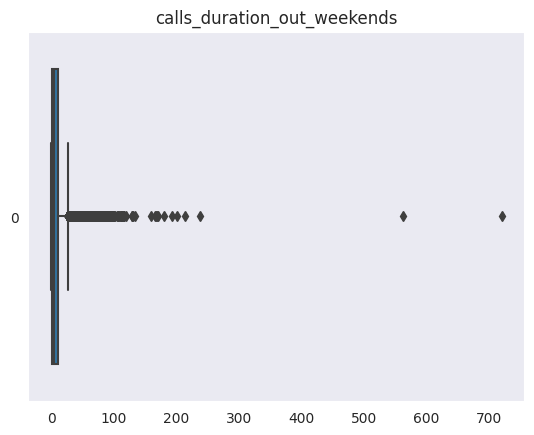

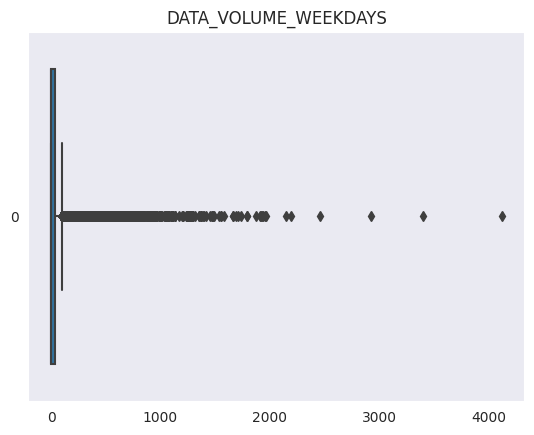

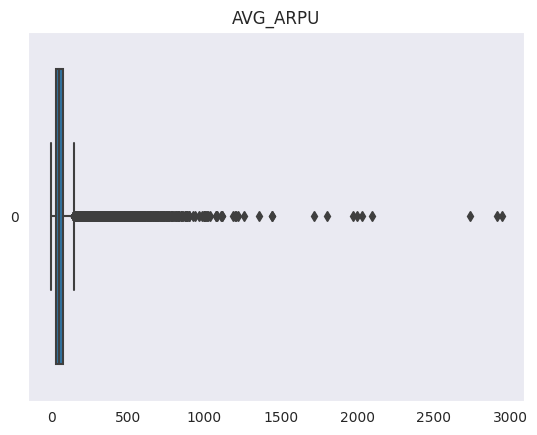

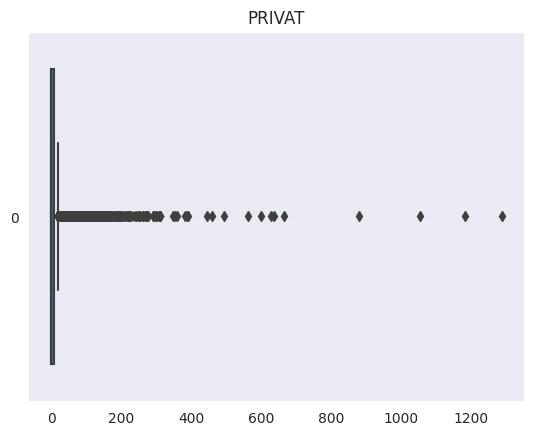

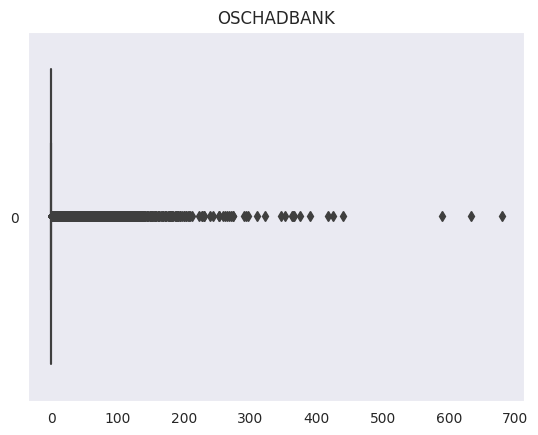

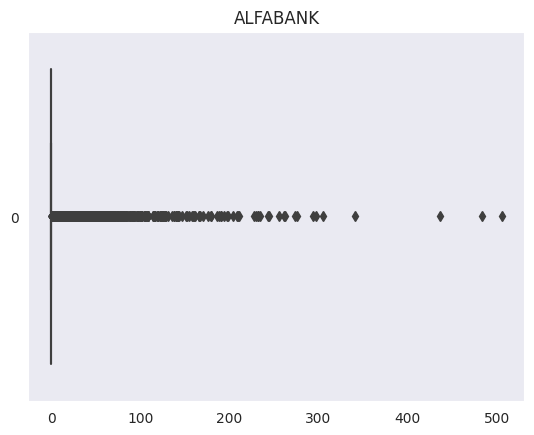

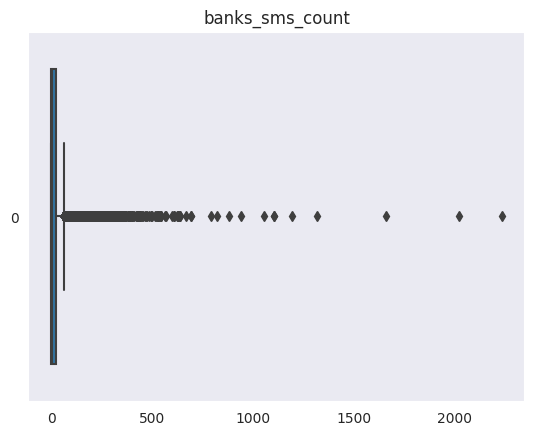

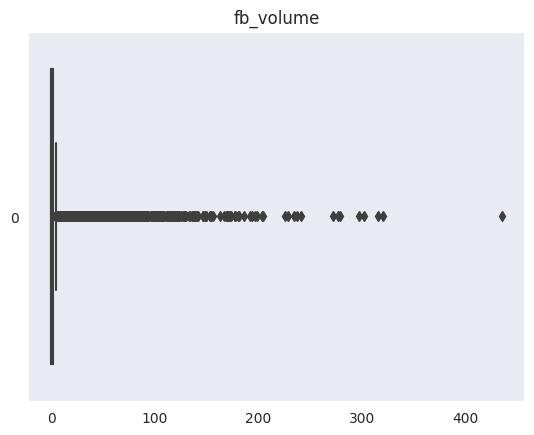

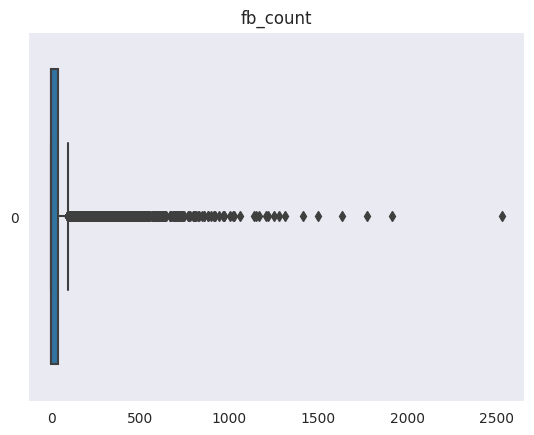

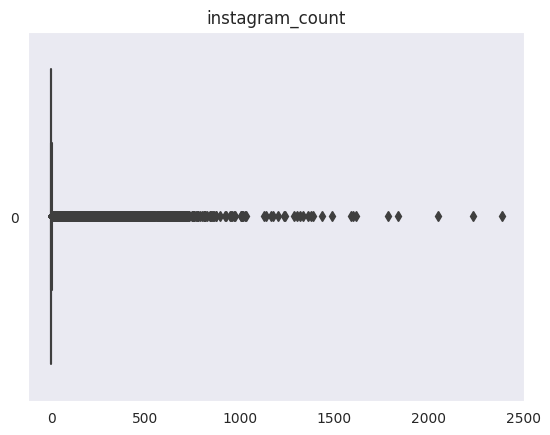

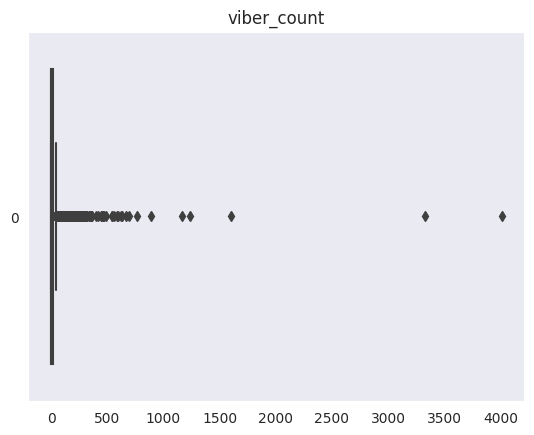

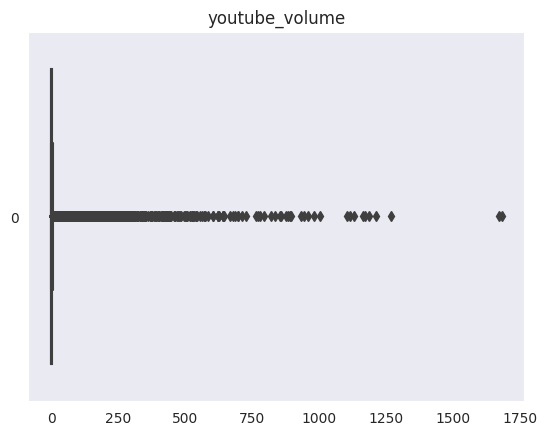

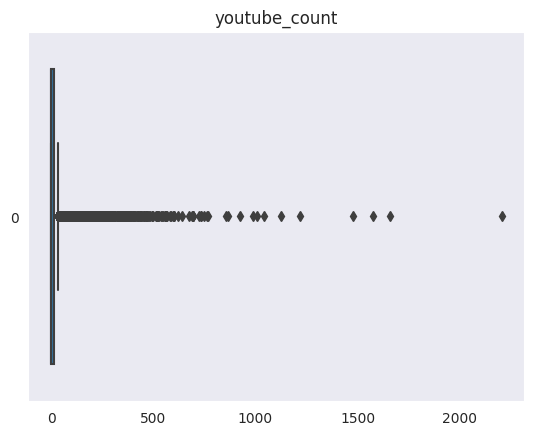

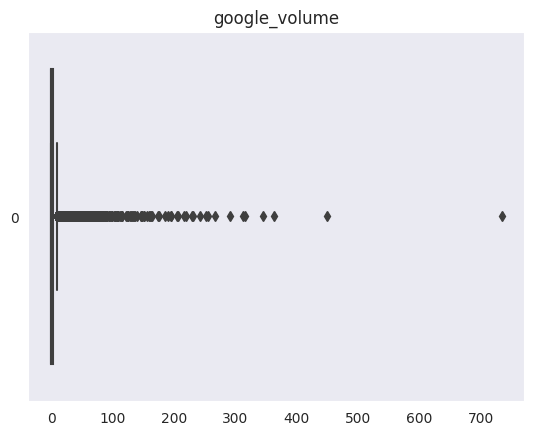

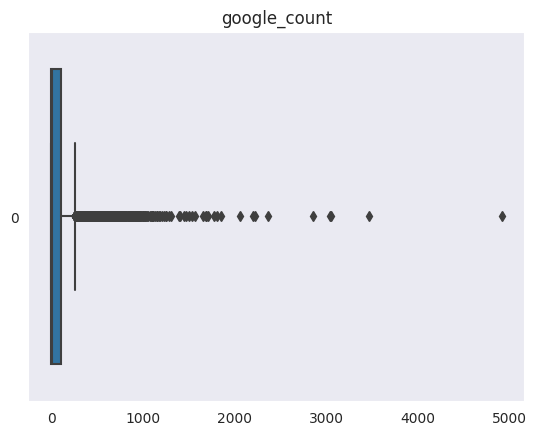

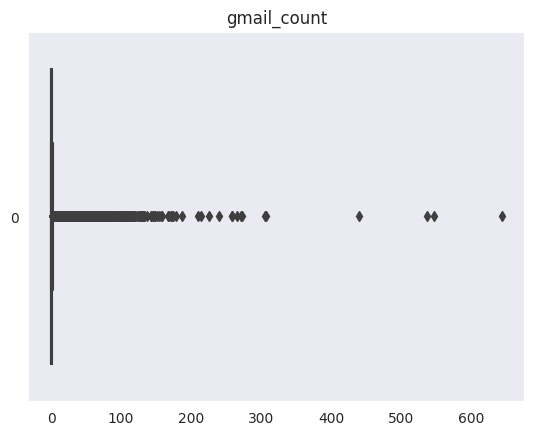

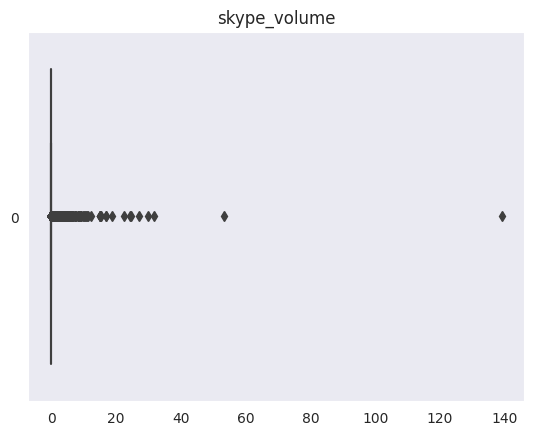

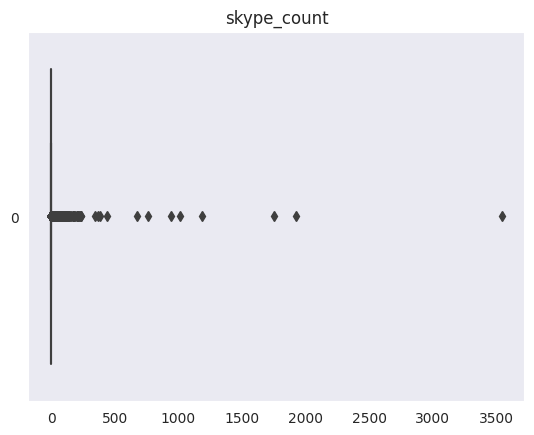

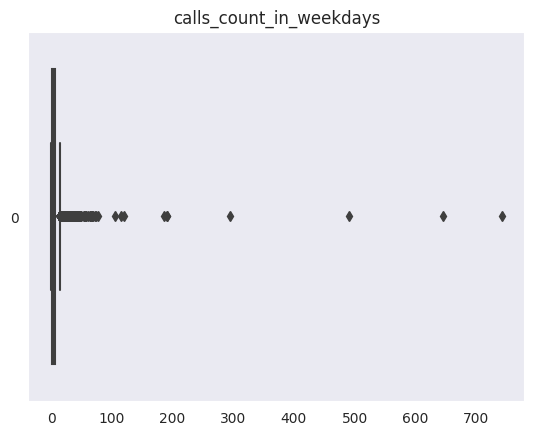

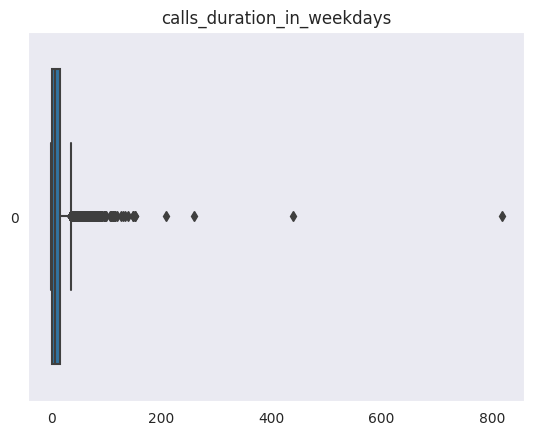

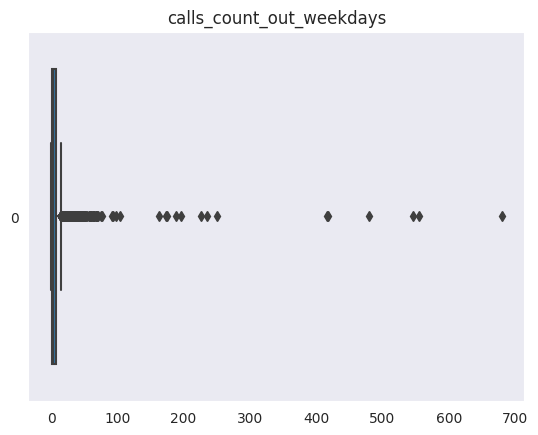

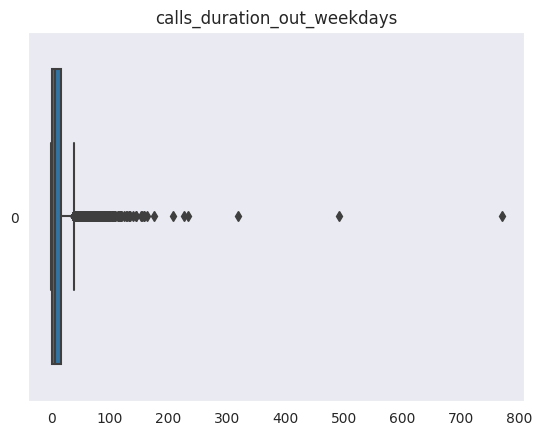

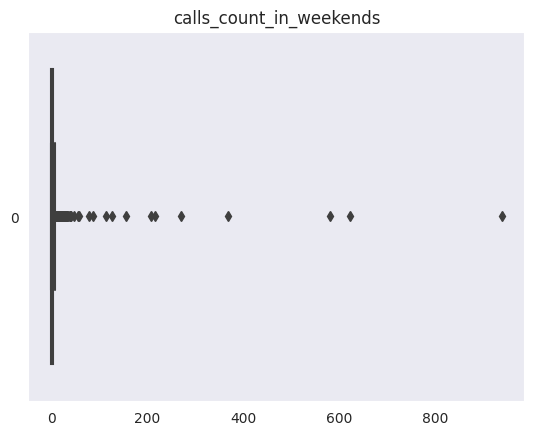

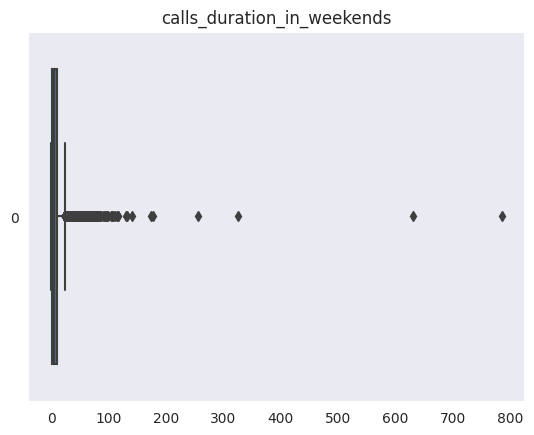

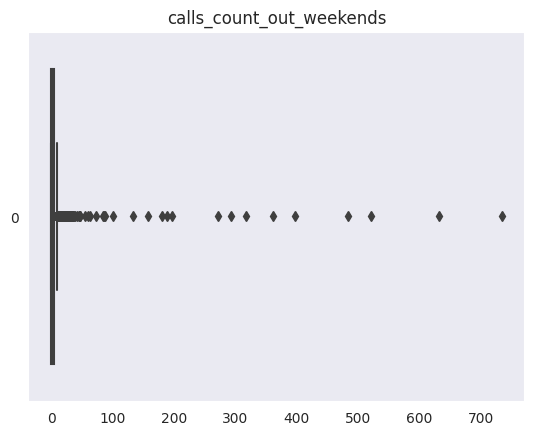

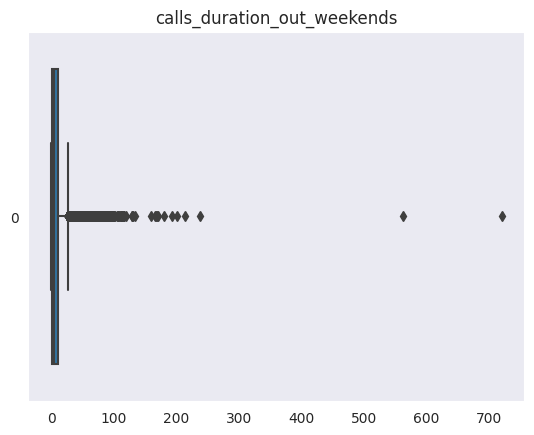

In [330]:
#@title visualization for abnormal_values
for x in columns_with_abnormal_values:
  sns.boxplot(df[x], orient='h')
  plt.title(x)
  plt.show()

In [331]:
#@title abnormal_values
abnormal_values = df.loc[(df["calls_duration_out_weekends"] > 150) |
                         (df["DATA_VOLUME_WEEKDAYS"] > 2000) |
                         (df["AVG_ARPU"] > 1500) |
                         (df["PRIVAT"] > 300) |
                         (df["OSCHADBANK"] > 500) |
                         (df["ALFABANK"] > 250) |
                         (df["banks_sms_count"] > 800) |
                         (df["fb_volume"] > 220) |
                         (df["fb_count"] > 1250) |
                         (df["instagram_count"] > 1500) |
                         (df["viber_count"] > 800) |
                         (df["youtube_volume"] > 1000) |
                         (df["youtube_count"] > 800) |
                         (df["google_volume"] > 270) |
                         (df["google_count"] > 2000) |
                         (df["skype_volume"] > 15) |
                         (df["gmail_count"] > 200) |
                         (df["skype_count"] > 300) |
                         (df["calls_count_in_weekdays"] > 150) |
                         (df["calls_duration_in_weekdays"] > 200) |
                         (df["calls_count_out_weekdays"] > 300) |
                         (df["calls_duration_out_weekdays"] > 250) |
                         (df["calls_count_in_weekends"] > 200) |
                         (df["calls_duration_in_weekends"] > 200) |
                         (df["calls_count_out_weekends"] > 200) |
                         (df["calls_duration_out_weekends"] > 300)].index.tolist()

In [332]:
len(abnormal_values)

185

In [333]:
df = df.drop(abnormal_values)

Видалив всі викиди з датафрейму, 185 рядків

In [334]:
df['lifetime'] = abs(df['lifetime'])

Застосований модуль для перетворення від'ємних значень у додатні

## Data Visualization

Зобразимо взаємозв'язки наших ознак за допомогою візуалізації кореляції

In [335]:
corr = df.corr(method='spearman')

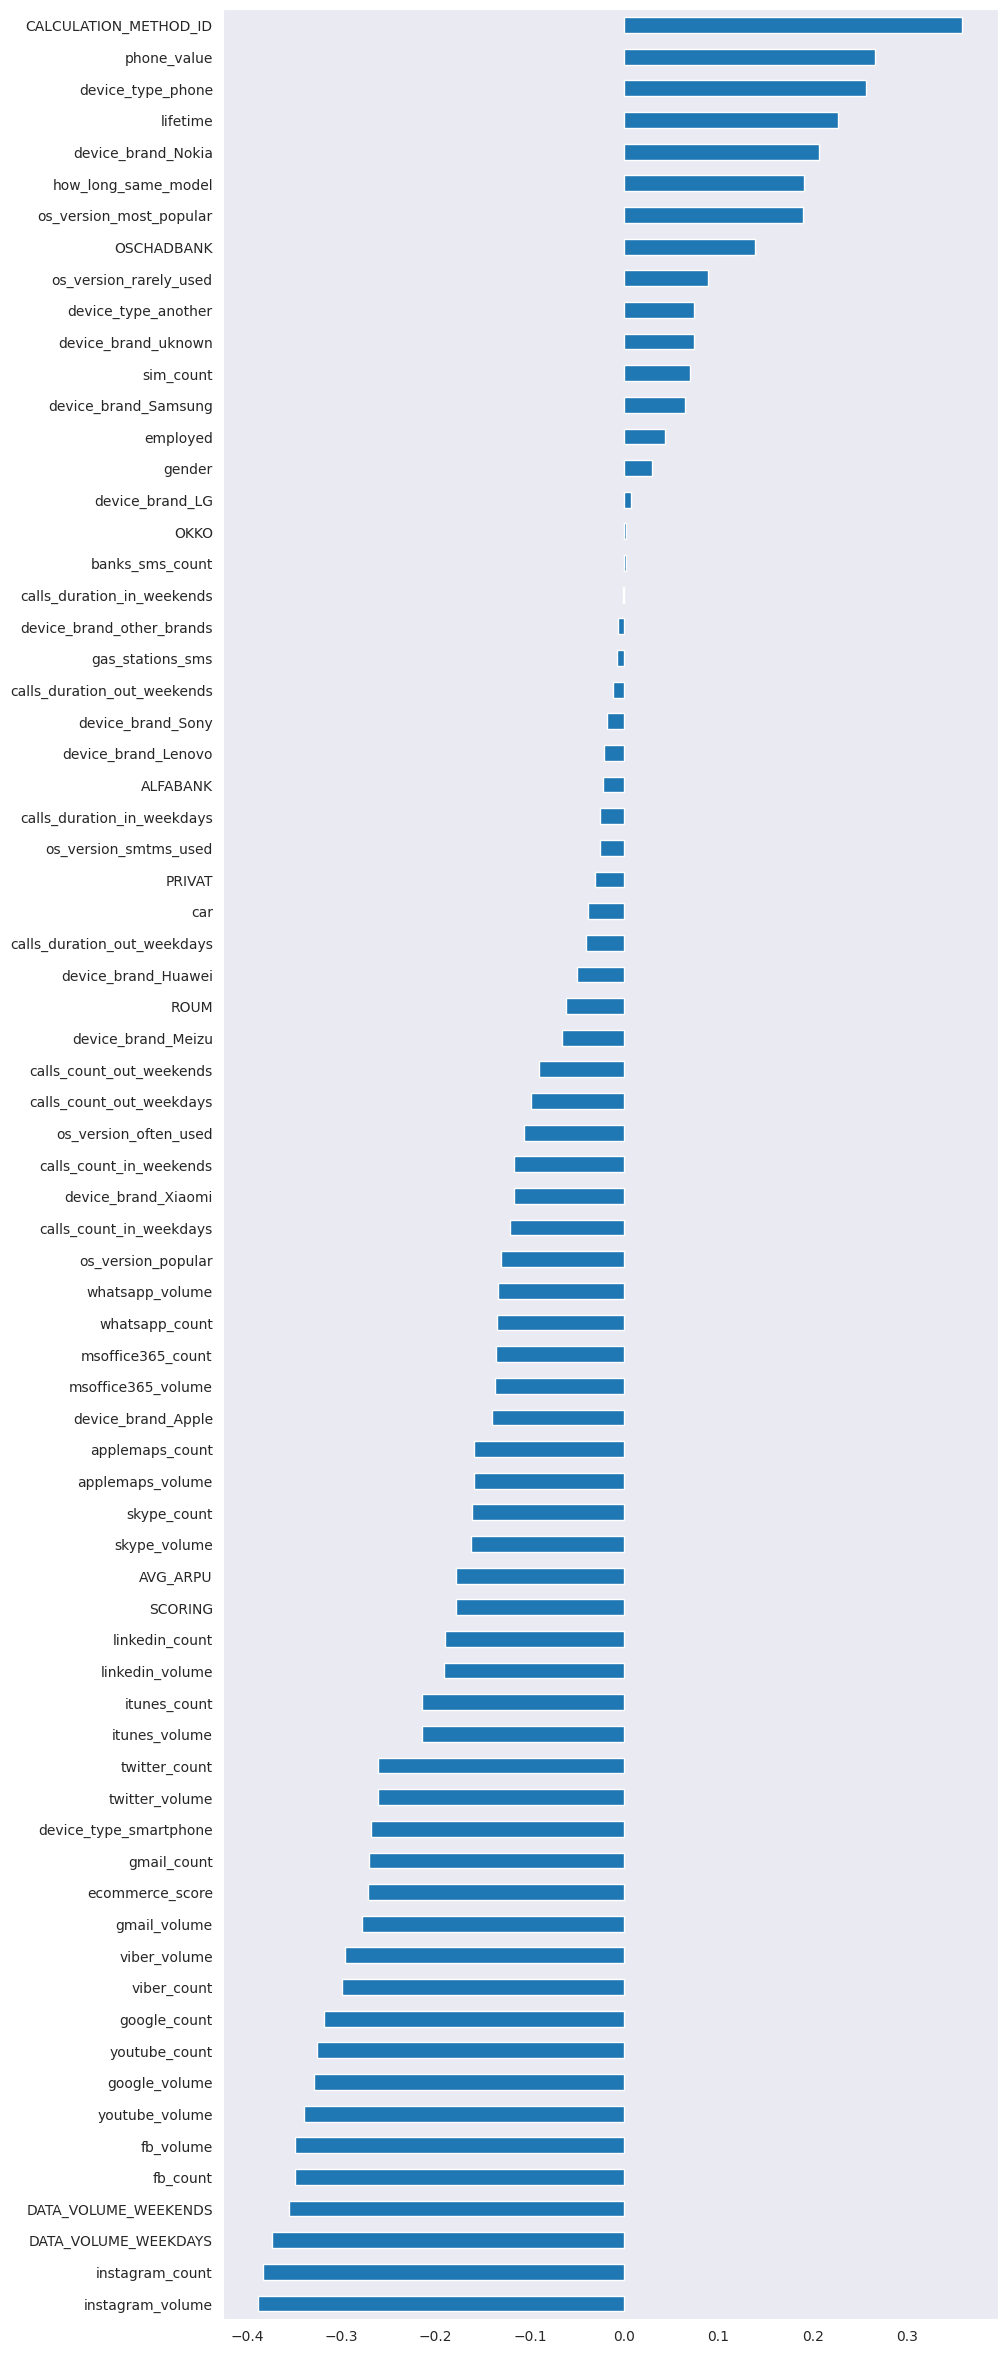

In [336]:
plt.figure(figsize=(10, 30))
corr['target'][:-1].sort_values().plot(kind='barh')
plt.show()

Кореляція з таргетом досить непогана.Більшість змінних мають від'ємну кореляцію

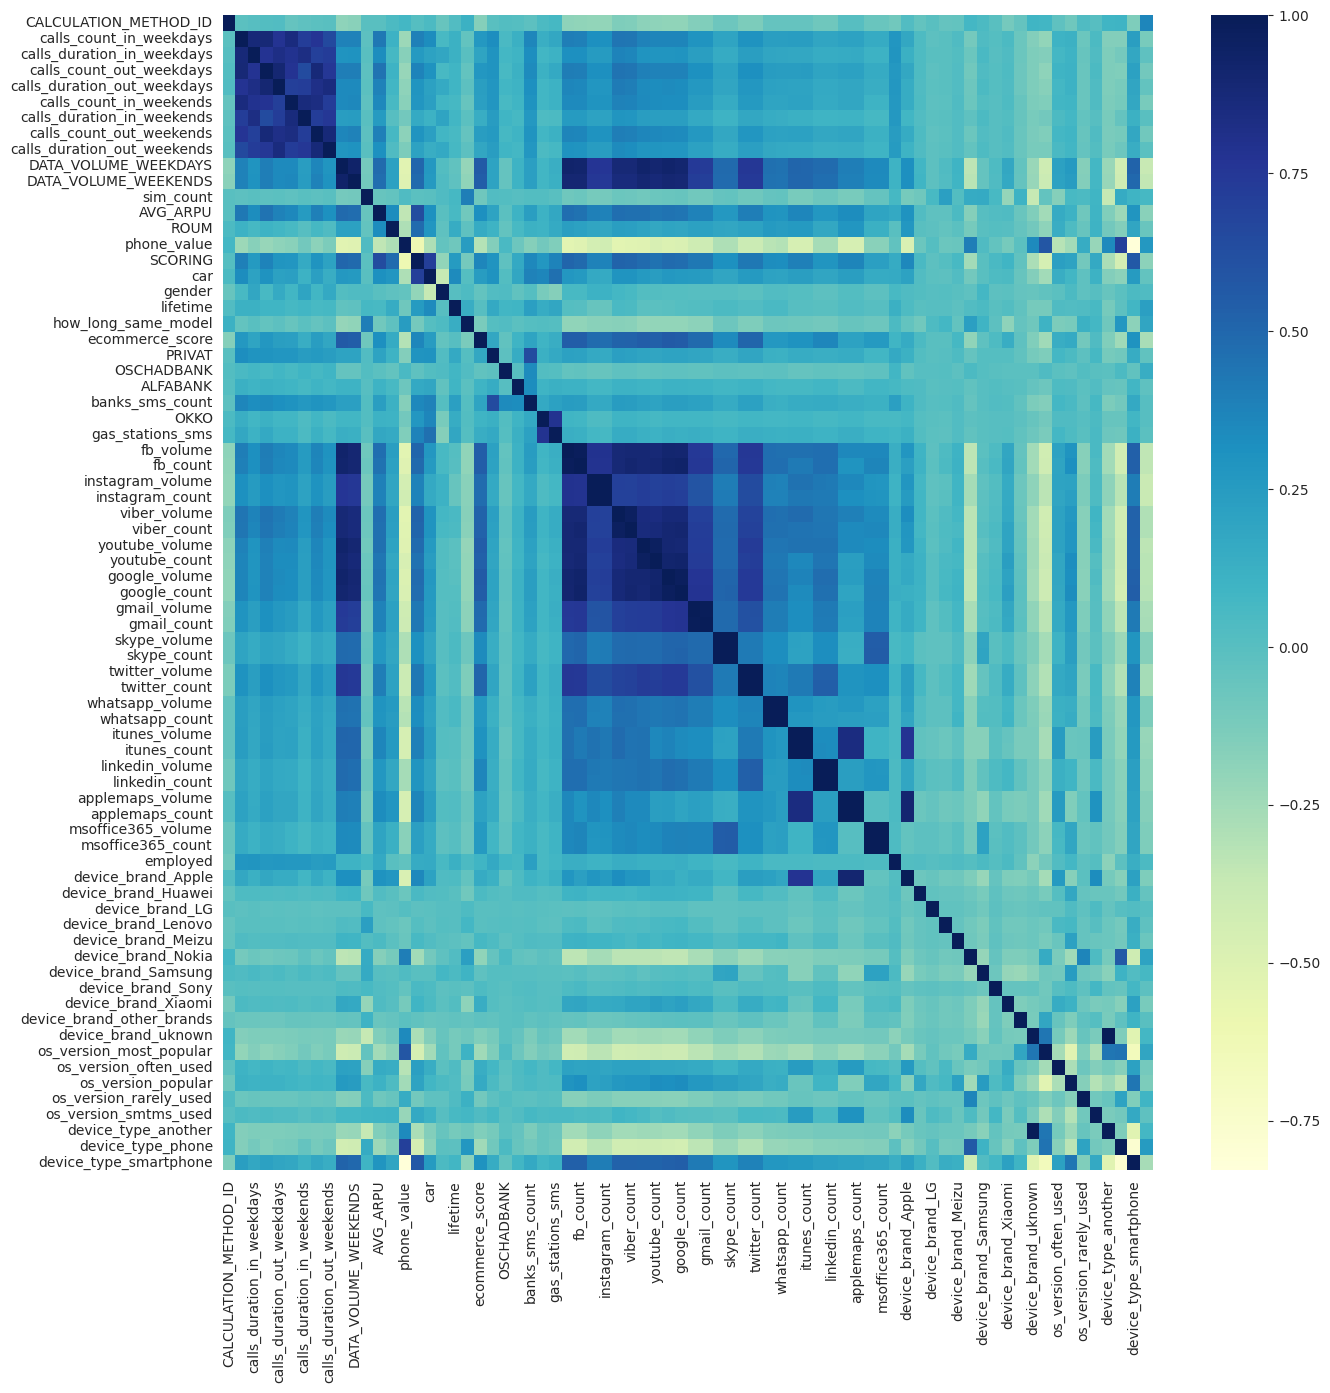

In [337]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr[:-1], cmap='YlGnBu')
plt.show()

Взаємозв'язок між собою мають змінні пов'язані з дзвінками(тип, тривалість, кількість, час), а також між собою мають кореляцію змінні дата-трафіку(які сервіси, кількість, час)

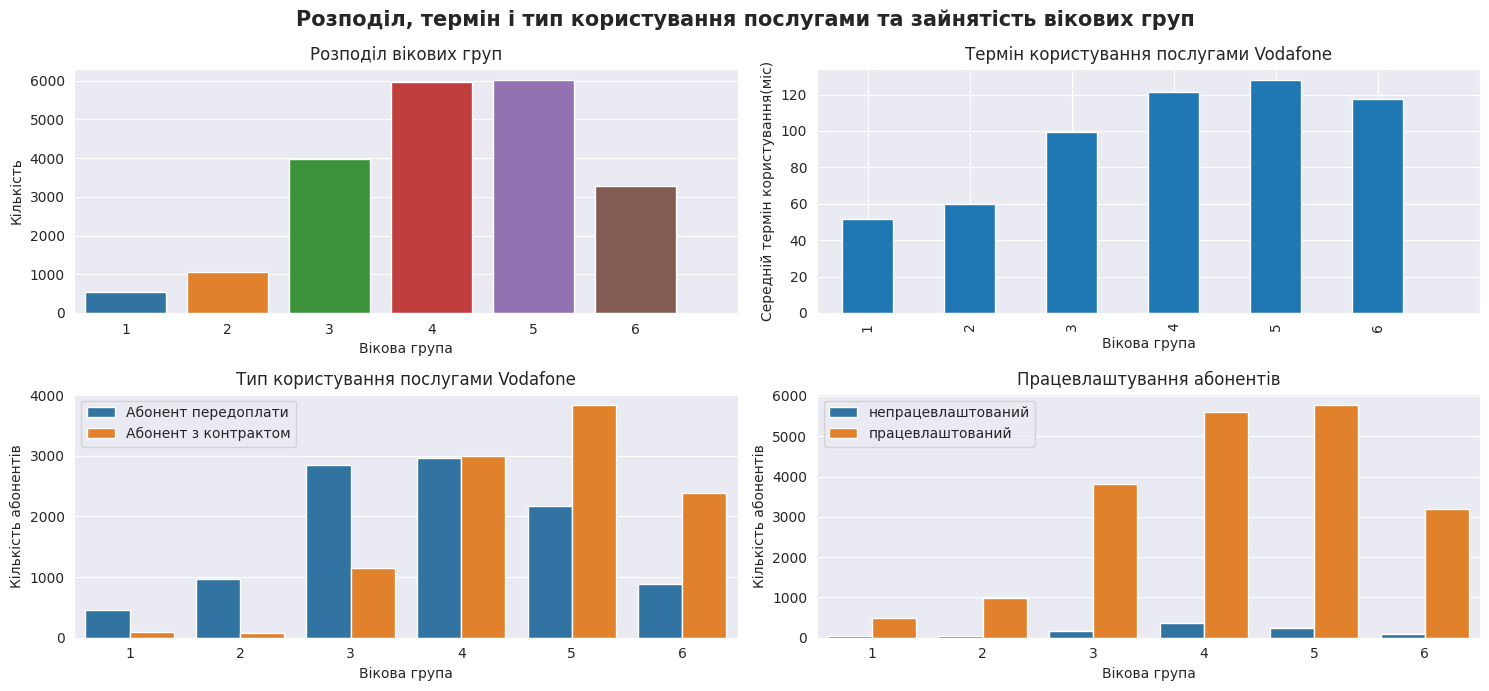

In [338]:
#@title Розподіл, термін і тип користування послугами та зайнятість вікових груп
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

sns.countplot(x=df["target"], ax=axes[0,0])
axes[0,0].set_xticks ([0, 1, 2, 3, 4, 5, 6])
axes[0,0].set_ylabel('Кількість')
axes[0,0].set_xlabel('Вікова група')
axes[0,0].set_title('Розподіл вікових груп')

df.groupby("target")["lifetime"].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xticks ([0, 1, 2, 3, 4, 5, 6])
axes[0,1].set_ylabel('Середній термін користування(міс)')
axes[0,1].set_xlabel('Вікова група')
axes[0,1].set_title('Термін користування послугами Vodafone')

sns.countplot(data=df, x="target", hue="CALCULATION_METHOD_ID", ax=axes[1,0])
axes[1,0].set_xlabel('Вікова група')
axes[1,0].set_ylabel('Кількість абонентів')
axes[1,0].set_title('Тип користування послугами Vodafone')
axes[1,0].legend(['Абонент передоплати', 'Абонент з контрактом'])


sns.countplot(data=df, x="target", hue="employed", ax=axes[1,1])
axes[1,1].set_ylabel('Кількість абонентів')
axes[1,1].set_xlabel('Вікова група')
axes[1,1].legend(['непрацевлаштований', 'працевлаштований'])
axes[1,1].set_title('Працевлаштування абонентів')

fig.suptitle('Розподіл, термін і тип користування послугами та зайнятість вікових груп', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

Отже в датасеті 6 вікових груп, з яких найбільше абонентів з 4 і 5 групи,а найменше з 1 і 2 групи.

По графіку терміну користування можна зробити висновок, що 1 група наймолодша, та чим більша категорія, тим вона старша.

По графіку працевлаштування видно що всі групи працюючі, тобто їх вік 18-60(пенсійний вік).

Також можна помітити, що чим старша вікова група, тим більше в ній співвідношення контрактного типу користування послугами до абонплати.

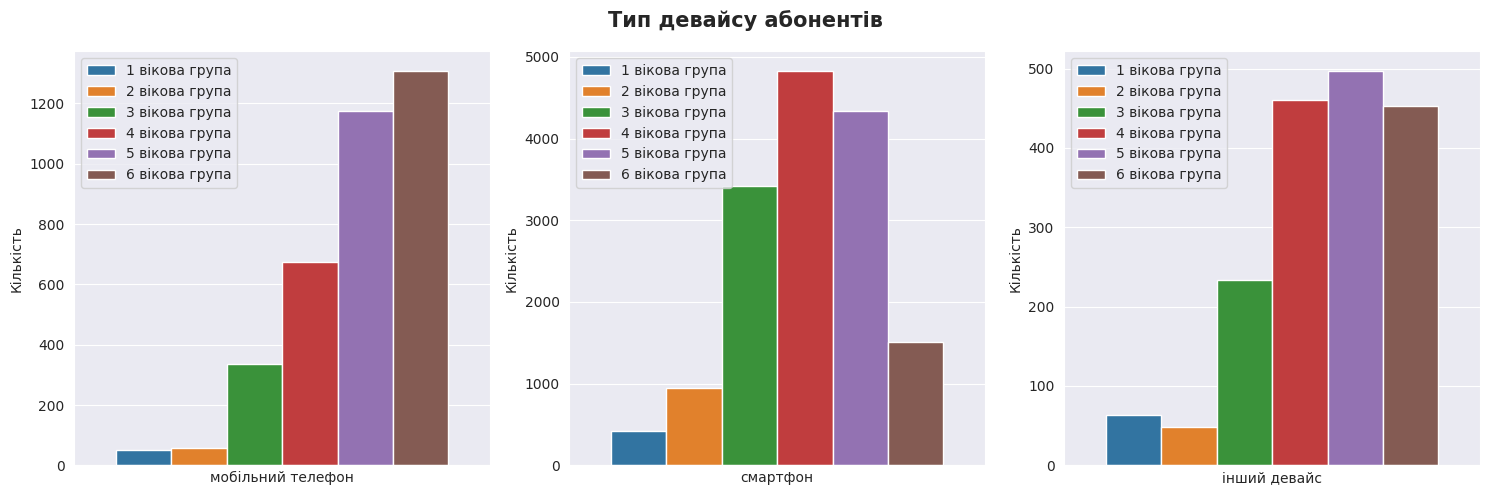

In [339]:
#@title Тип девайсу по віковим категоріям
another = df[df["device_type_another"] > 0]
phone = df[df["device_type_phone"] > 0]
smartphone = df[df["device_type_smartphone"] > 0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=phone, x="device_type_phone", ax=axes[0], hue='target')
axes[0].set_xlabel('мобільний телефон')
axes[0].set_ylabel('Кількість')
axes[0].set_xticks([])
axes[0].legend(['1 вікова група', '2 вікова група', '3 вікова група', '4 вікова група', '5 вікова група', '6 вікова група'])

sns.countplot(data=smartphone, x="device_type_smartphone", ax=axes[1], hue='target')
axes[1].set_xlabel('смартфон')
axes[1].set_ylabel('Кількість')
axes[1].set_xticks([])
axes[1].legend(['1 вікова група', '2 вікова група', '3 вікова група', '4 вікова група', '5 вікова група', '6 вікова група'])

sns.countplot(data=another, x="device_type_another", ax=axes[2], hue='target')
axes[2].set_xlabel('інший девайс')
axes[2].set_ylabel('Кількість')
axes[2].set_xticks([])
axes[2].legend(['1 вікова група', '2 вікова група', '3 вікова група', '4 вікова група', '5 вікова група', '6 вікова група'])

fig.suptitle('Тип девайсу абонентів', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

*   Смартфон: найбільша кількість девайсів цього типу.Це пов'язано з тим, що ним користуються найбільше 3, 4 і 5 групи, а їх в нашій вибірці найбільше.
*   Мобільний телефон: їх кількість меньша, найбільше цим типом девайсів користуються абоненти найстаршої вікової групи, чим молодша вікова група, тим меньше користуються простими мобільними телефонами.
*   Інший девайс: існують різні девайси, які можна використовувати для користуванням послугами Vodafone(ноутбуки, планшети, модеми, датчики, тощо...)В основному їх використовують 6, 5 і 4 вікові групи, також трішки 3 група і зовсім мало 2 і 1 вікові групи.




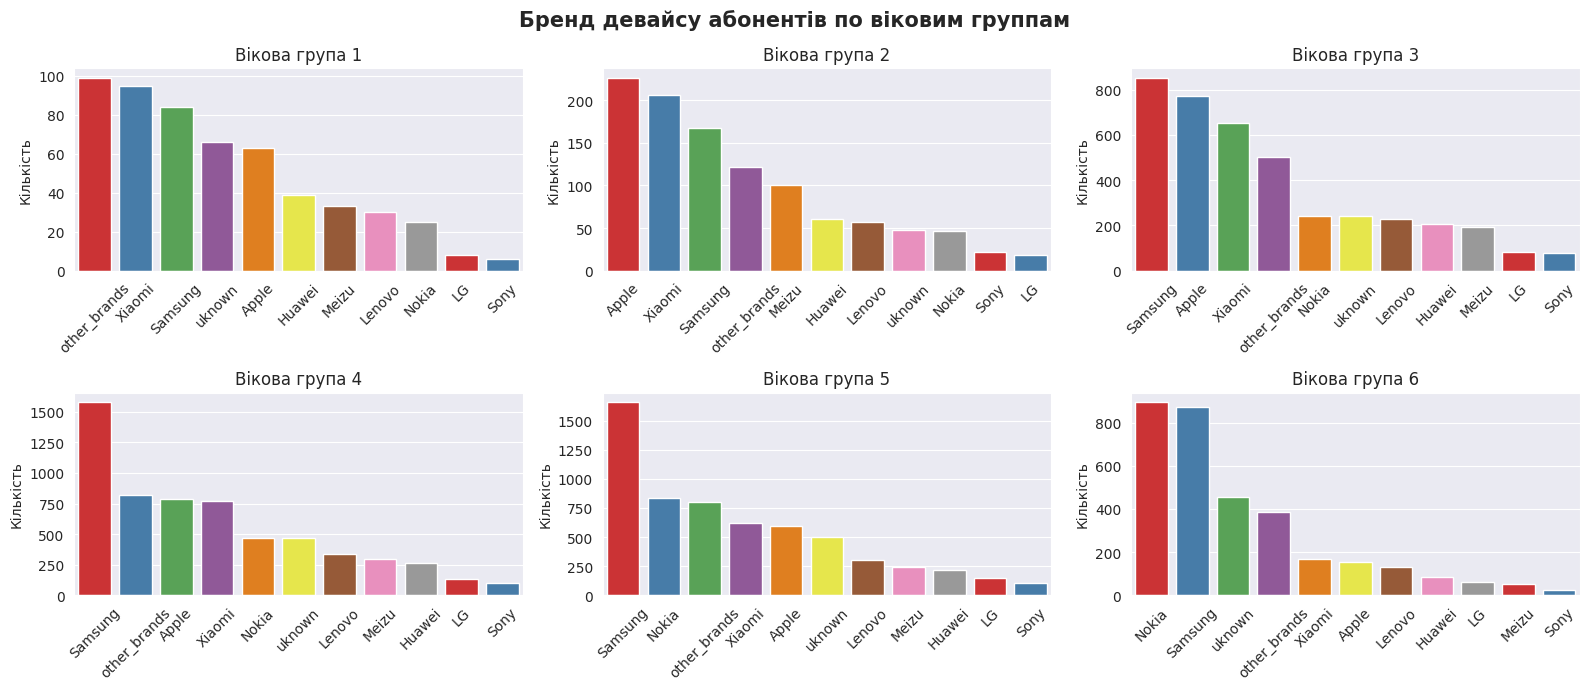

In [340]:
#@title Бренд девайсу абонентів
df_copy['device_brand'] = df_copy['device_brand'].map(lambda x: 'other_brands' if x in not_popular_brands else x)
df_copy['device_brand'] = df_copy['device_brand'].replace({'0': 'uknown'})

df1 = df_copy.loc[df_copy["target"] == 1]
df2 = df_copy.loc[df_copy["target"] == 2]
df3 = df_copy.loc[df_copy["target"] == 3]
df4 = df_copy.loc[df_copy["target"] == 4]
df5 = df_copy.loc[df_copy["target"] == 5]
df6 = df_copy.loc[df_copy["target"] == 6]

order1 = df1["device_brand"].value_counts().index.tolist()
order2 = df2["device_brand"].value_counts().index.tolist()
order3 = df3["device_brand"].value_counts().index.tolist()
order4 = df4["device_brand"].value_counts().index.tolist()
order5 = df5["device_brand"].value_counts().index.tolist()
order6 = df6["device_brand"].value_counts().index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 7))

sns.countplot(data=df1, x="device_brand", order=order1, ax=axes[0,0], palette = "Set1")
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Кількість')
axes[0,0].set_title('Вікова група 1')
axes[0,0].set_xticklabels(order1, rotation=45)

sns.countplot(data=df2, x="device_brand", order=order2, ax=axes[0,1], palette = "Set1")
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Кількість')
axes[0,1].set_title('Вікова група 2')
axes[0,1].set_xticklabels(order2, rotation=45)

sns.countplot(data=df3, x="device_brand", order=order3, ax=axes[0,2], palette = "Set1")
axes[0,2].set_xlabel('')
axes[0,2].set_ylabel('Кількість')
axes[0,2].set_title('Вікова група 3')
axes[0,2].set_xticklabels(order3, rotation=45)

sns.countplot(data=df4, x="device_brand", order=order4, ax=axes[1,0], palette = "Set1")
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Кількість')
axes[1,0].set_title('Вікова група 4')
axes[1,0].set_xticklabels(order4, rotation=45)

sns.countplot(data=df5, x="device_brand", order=order5, ax=axes[1,1], palette = "Set1")
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Кількість')
axes[1,1].set_title('Вікова група 5')
axes[1,1].set_xticklabels(order5, rotation=45)

sns.countplot(data=df6, x="device_brand", order=order6, ax=axes[1,2], palette = "Set1")
axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('Кількість')
axes[1,2].set_title('Вікова група 6')
axes[1,2].set_xticklabels(order6, rotation=45)

fig.suptitle('Бренд девайсу абонентів по віковим группам', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

В

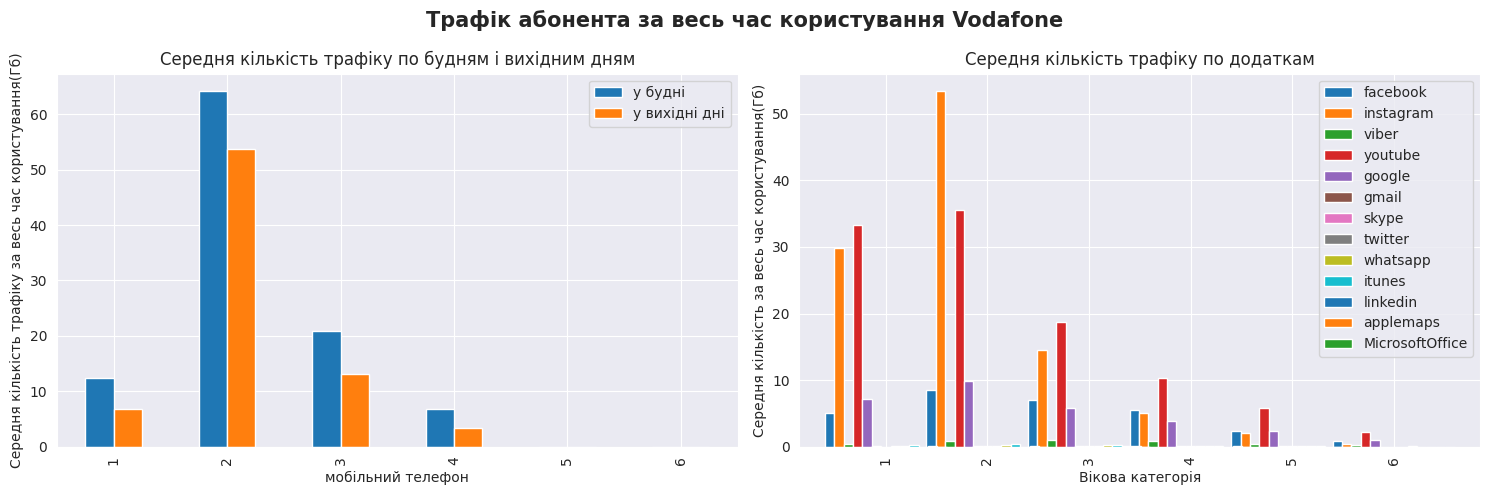

In [341]:
#@title Трафік абонента за весь час користування Vodafone
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df.groupby("target")[["DATA_VOLUME_WEEKDAYS", "DATA_VOLUME_WEEKENDS"]].median().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('мобільний телефон')
axes[0].set_ylabel('Середня кількість трафіку за весь час користування(Гб)')
axes[0].set_title('Середня кількість трафіку по будням і вихідним дням')
axes[0].legend(["у будні", "у вихідні дні"])

df.groupby("target")[['fb_volume','instagram_volume', 'viber_volume', 'youtube_volume', 'google_volume', 'gmail_volume',
                      'skype_volume', 'twitter_volume', 'whatsapp_volume','itunes_volume','linkedin_volume','applemaps_volume',
                      'msoffice365_volume']].mean().plot(kind='bar', width=1.2, ax=axes[1])
axes[1].set_xlabel('Вікова категорія')
axes[1].set_ylabel('Середня кількість за весь час користування(Гб)')
axes[1].set_title('Середня кількість трафіку по додаткам')
axes[1].legend(['facebook','instagram', 'viber', 'youtube', 'google', 'gmail',
                      'skype', 'twitter', 'whatsapp','itunes','linkedin','applemaps',
                      'MicrosoftOffice'])

fig.suptitle('Трафік абонента за весь час користування Vodafone', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

В загальному інтерес користування інтернетом зростає від 1 вікової групи до 2(пік), надалі чим старша група стає, тим трафік зменшується.Якщо порівнювати вихідні та будні дні, то невелика перевага в будніх днях по всім групам, але враховуючи те, що будніх днів 5, а вихідних 2, то в порівнянні в одноденний період - звісно більше користуються в вихідні днію

По додаткам та сервісам можна виділити: instagram, youtube, google та facebook.Ці сервіси найбільш популярні і користування ними більше у перших двох груп, надалі чим старша група стає, тим трафік зменшується.

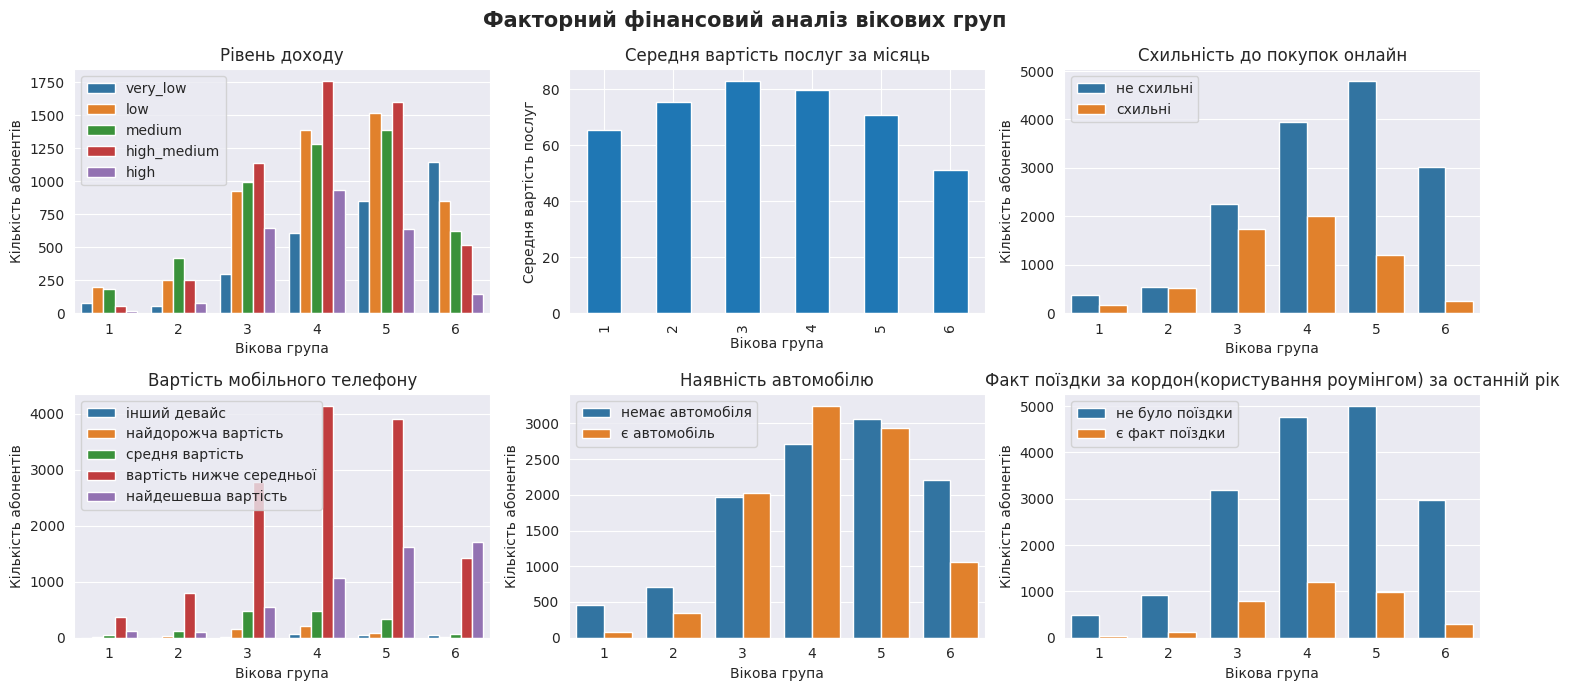

In [342]:
#@title Факторний фінансовий аналіз вікових груп
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(data=df, x="target", hue="SCORING", ax=axes[0,0])
axes[0,0].set_xlabel('Вікова група')
axes[0,0].set_ylabel('Кількість абонентів')
axes[0,0].set_title('Рівень доходу')
axes[0,0].legend(['very_low', 'low', 'medium', 'high_medium', 'high'])

df.groupby("target")["AVG_ARPU"].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xlabel('Вікова група')
axes[0,1].set_ylabel('Середня вартість послуг')
axes[0,1].set_title('Середня вартість послуг за місяць')

sns.countplot(data=df, x="target", hue="ecommerce_score", ax=axes[0,2])
axes[0,2].set_xlabel('Вікова група')
axes[0,2].set_ylabel('Кількість абонентів')
axes[0,2].set_title('Схильність до покупок онлайн')
axes[0,2].legend(['не схильні', 'схильні'])

sns.countplot(data=df, x="target", hue="phone_value", ax=axes[1,0])
axes[1,0].set_xlabel('Вікова група')
axes[1,0].set_ylabel('Кількість абонентів')
axes[1,0].set_title('Вартість мобільного телефону')
axes[1,0].legend(['інший девайс', 'найдорожча вартість', 'средня вартість', 'вартість нижче середньої', 'найдешевша вартість'])

sns.countplot(data=df, x="target", hue="car", ax=axes[1,1])
axes[1,1].set_xlabel('Вікова група')
axes[1,1].set_ylabel('Кількість абонентів')
axes[1,1].set_title('Наявність автомобілю')
axes[1,1].legend(['немає автомобіля', 'є автомобіль'])

sns.countplot(data=df, x="target", hue="ROUM", ax=axes[1,2])
axes[1,2].set_xlabel('Вікова група')
axes[1,2].set_ylabel('Кількість абонентів')
axes[1,2].set_title('Факт поїздки за кордон(користування роумінгом) за останній рік')
axes[1,2].legend(['не було поїздки', 'є факт поїздки'])

fig.suptitle('Факторний фінансовий аналіз вікових груп', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

Рівень доходу найбільший в 3, 4 та 5 вікових групах, серед цих абонентів переважають люди з доходом вище середнього.В 1 групі переважають люди з доходом низьким та середнім, в 2 групі найбільше людей з середнім рівнем доходу.В 6 группі найбільше людей з доходом дуже низьким і низьким.

Як наслідок кожен другий абонент 3, 4 і 5 групп має автомобіль, вони частіше їздять за кордон, в порівнянні з іншими группами.

Можна також зробити висновок, що починаючи з 2 вікової групи, чим старше стає абонент, то стає більш заощадливіший - менша кількість людей з вікової групи купує більш дорожчі телефони, обирання послуг оператора зв'язку меншої вартості.

# Data Standartization

In [343]:
#@title StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_st = scaler.fit_transform(X)

# PCA and Visualization

In [344]:
#@title Зменшення розмірності до 2 компонентів за допомогою методу PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc_components = pca.fit_transform(X_st)

In [345]:
#@title Вивів накопичувану відносну дисперсію, пояснювану кожною компонентою.Отже наші компоненти несуть всього 19% інформації обробленого датасету, що досить мало.
pca.explained_variance_ratio_.cumsum()

array([0.13402525, 0.19729636])

Виведу навантаження головних компонентів на початкові координати і спробую дізнатись, які саме ознаки наші компоненти увібрали до себе.Також виведу матрицю навантаження відсортовану спочатку по першому головному компоненту, а потім по другому.

In [346]:
#@title loading_matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns[:-1])
loading_matrix.sort_values('PC1', ascending=False).head(30)['PC1']

DATA_VOLUME_WEEKDAYS           0.692280
DATA_VOLUME_WEEKENDS           0.649952
SCORING                        0.634887
viber_count                    0.634101
fb_count                       0.608882
google_count                   0.601829
fb_volume                      0.557122
itunes_count                   0.546734
calls_count_in_weekdays        0.541906
device_type_smartphone         0.539275
viber_volume                   0.539007
instagram_count                0.533523
calls_count_out_weekdays       0.528352
ecommerce_score                0.527790
instagram_volume               0.489483
AVG_ARPU                       0.487948
calls_duration_out_weekdays    0.482676
applemaps_count                0.482501
youtube_count                  0.475623
google_volume                  0.471581
calls_count_in_weekends        0.465547
youtube_volume                 0.464470
calls_count_out_weekends       0.460131
device_brand_Apple             0.443581
calls_duration_in_weekdays     0.435850


Перший головний компонент 'PC1' в більшій мірі містить інформацію інтернет-трафіку, рівень доходу, схильність до покупок онлайн, ознаки смартфону, вартість послуг, девайсу бренду Apple, інформацію про дзвінки(тривалість, кількість) та наявність машини.

In [347]:
loading_matrix.sort_values('PC2', ascending=False).head(20)['PC2']

calls_duration_in_weekdays     0.707062
calls_duration_out_weekdays    0.691838
calls_duration_out_weekends    0.656299
calls_duration_in_weekends     0.655489
calls_count_in_weekdays        0.640150
calls_count_out_weekdays       0.639974
calls_count_in_weekends        0.634103
calls_count_out_weekends       0.631935
device_type_phone              0.178574
employed                       0.172153
phone_value                    0.167051
CALCULATION_METHOD_ID          0.145744
device_brand_Nokia             0.142443
how_long_same_model            0.129515
PRIVAT                         0.119396
lifetime                       0.118308
gender                         0.116708
os_version_most_popular        0.114299
device_brand_Samsung           0.082982
banks_sms_count                0.073586
Name: PC2, dtype: float64

Другий головний компонент 'PC2' містить в основному інформацію про тривалість та кількість вхідних та вихідних дзвінків

In [348]:
#@title Створив датафрейм з головних компонентів та таргету
df_pca = pd.DataFrame(pc_components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

In [349]:
#@title Розбив створений датафрейм по віковим категоріям
pca_1 = df_pca[df_pca["target"] == 1]
pca_2 = df_pca[df_pca["target"] == 2]
pca_3 = df_pca[df_pca["target"] == 3]
pca_4 = df_pca[df_pca["target"] == 4]
pca_5 = df_pca[df_pca["target"] == 5]
pca_6 = df_pca[df_pca["target"] == 6]

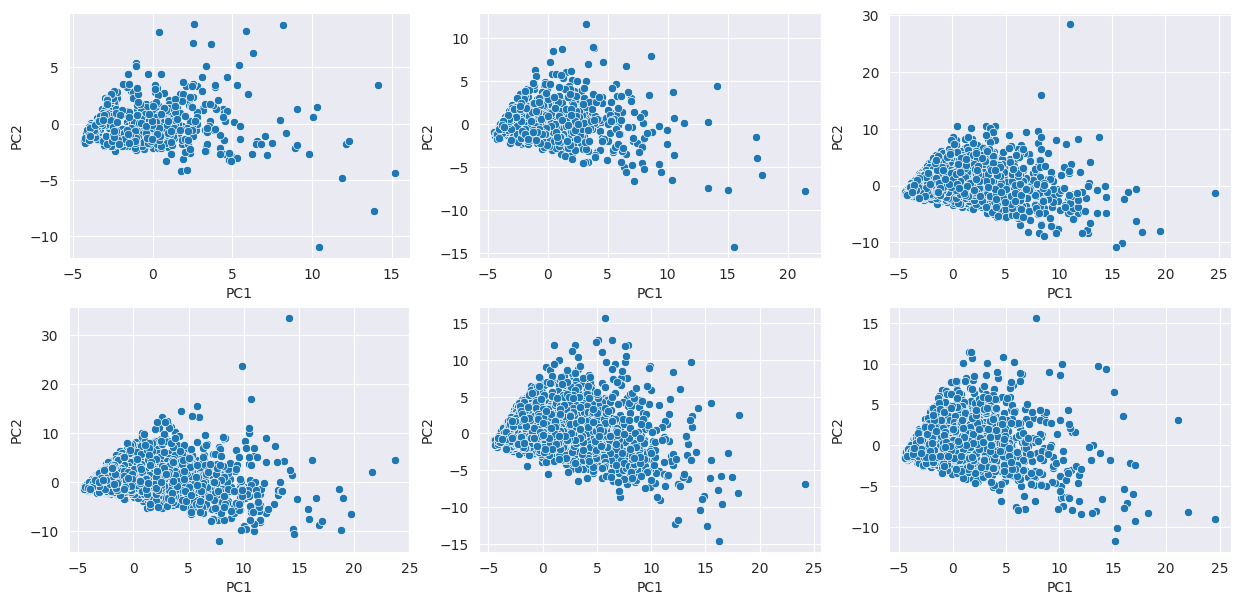

In [350]:
#@title Візуалізація на головних компонентах
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

sns.scatterplot(data=pca_1, x='PC1', y='PC2', ax=axes[0,0])

sns.scatterplot(data=pca_2, x='PC1', y='PC2', ax=axes[0,1])

sns.scatterplot(data=pca_3, x='PC1', y='PC2', ax=axes[0,2])

sns.scatterplot(data=pca_4, x='PC1', y='PC2', ax=axes[1,0])

sns.scatterplot(data=pca_5, x='PC1', y='PC2', ax=axes[1,1])

sns.scatterplot(data=pca_6, x='PC1', y='PC2', ax=axes[1,2])

plt.show()

Хоча головні компоненті містять мало інформації з нашого датасету, можна зробити деякі висновки.1, 3 і 4 групи найменше розмовляють по телефону, найбільше з усіх розмовлять по телефону абоненти з 5 та 6 групп.3, 4 і 5 группи мають найбільші рівні доходу.

In [351]:
#@title Розбиття на тестові та трейнові значення
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.3, random_state=2023)

# Побудова моделі за допомогою LogisticRegression

In [352]:
#@title LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.14      0.65      0.24       170
           2       0.28      0.47      0.35       304
           3       0.41      0.32      0.36      1192
           4       0.45      0.28      0.34      1766
           5       0.46      0.31      0.37      1844
           6       0.37      0.66      0.48       968

    accuracy                           0.37      6244
   macro avg       0.35      0.45      0.36      6244
weighted avg       0.42      0.37      0.37      6244



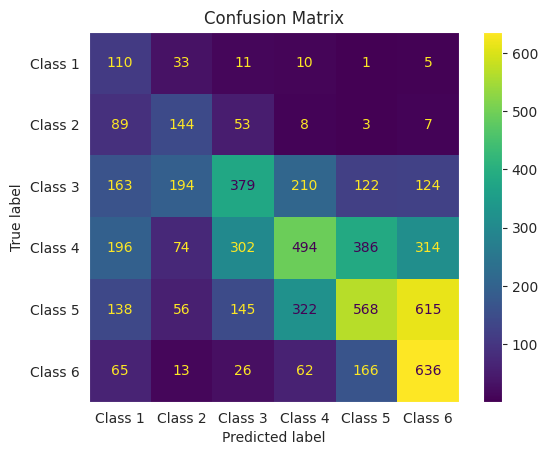

In [353]:
#@title ConfusionMatrixDisplay
sns.set_style("dark")
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
display.plot()
plt.title('Confusion Matrix')
plt.show()

Точність моделі 37%.Модель плутає 4,5 і 6 класси.Перші два класси розпізнає найкраще.

# Побудова моделі за допомогою DecisionTreeClassifier(дерево рішень)

In [354]:
#@title DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=2023)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.17      0.53      0.26       170
           2       0.23      0.51      0.32       304
           3       0.37      0.31      0.34      1192
           4       0.43      0.33      0.37      1766
           5       0.44      0.35      0.39      1844
           6       0.39      0.50      0.44       968

    accuracy                           0.37      6244
   macro avg       0.34      0.42      0.35      6244
weighted avg       0.40      0.37      0.38      6244



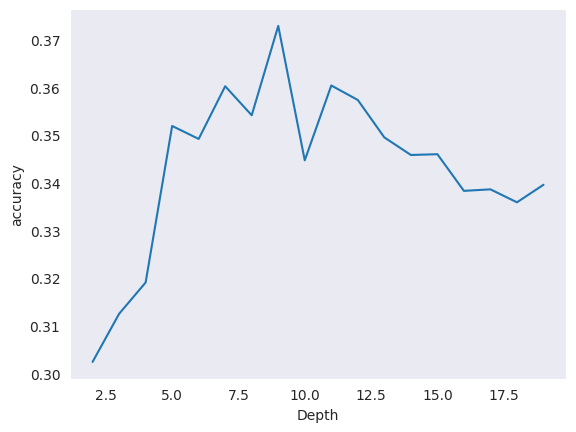

In [355]:
#@title Графік для визначення кількості гілок
accuracy_scores = []
for depth in range(2, 20):
  tree = DecisionTreeClassifier(max_depth=depth, random_state=2023, class_weight='balanced')
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(2, 20), accuracy_scores)
plt.xlabel('Depth')
plt.ylabel('accuracy')
plt.show()

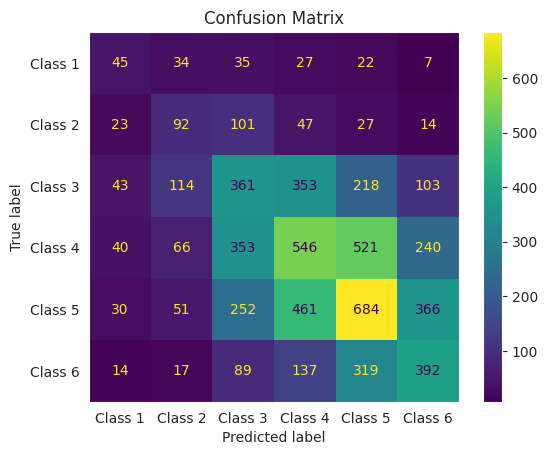

In [356]:
#@title ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
display.plot()
plt.title('Confusion Matrix')
plt.show()

Розпізнавання класів покращилось тільки для 5 классу, а в загальному погіршилось.

# Побудова моделі за допомогою RandomForest

In [357]:
#@title RandomForest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=2023)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.26      0.32       170
           2       0.42      0.41      0.42       304
           3       0.44      0.44      0.44      1192
           4       0.42      0.40      0.41      1766
           5       0.44      0.43      0.43      1844
           6       0.46      0.55      0.50       968

    accuracy                           0.44      6244
   macro avg       0.43      0.42      0.42      6244
weighted avg       0.43      0.44      0.43      6244



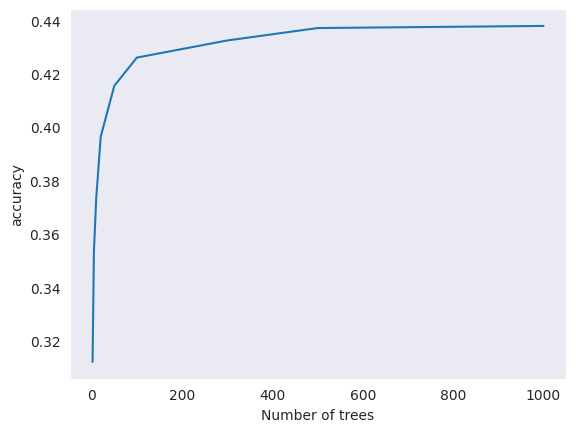

In [ ]:
#@title Графік для визначення числа дерев
'''accuracy_scores = []
for n_est in [2, 5, 10, 20, 50, 100, 300, 500, 1000]:
  forest = RandomForestClassifier(n_estimators=n_est, random_state=2023, n_jobs=-1, class_weight='balanced')
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot([2, 5, 10, 20, 50, 100, 300, 500, 1000], accuracy_scores)
plt.xlabel('Number of trees')
plt.ylabel('accuracy')
plt.show()'''

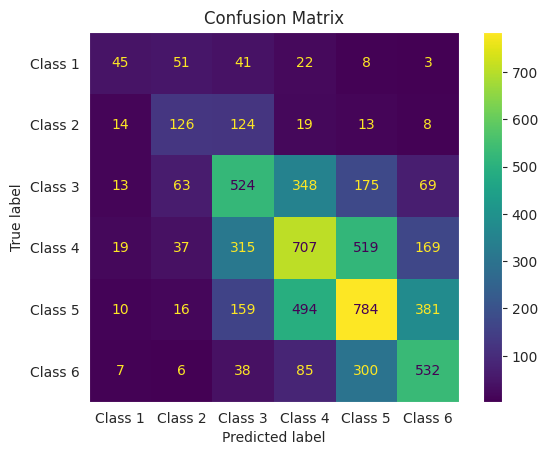

In [358]:
#@title ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
display.plot()
plt.title('Confusion Matrix')
plt.show()

Результат покращився, точність моделі 44%.Модель найбільше плутає 4 і 5 класси.

# Побудова моделі за допомогою ансамблю VotingClassifier

In [359]:
#@title Voting
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(max_iter=1000, random_state=2023, class_weight='balanced')
model2 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=2023)
model3 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=2023, class_weight='balanced', n_jobs=-1)
voting_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3)])
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.14      0.65      0.22       170
           2       0.30      0.49      0.37       304
           3       0.41      0.36      0.38      1192
           4       0.43      0.28      0.34      1766
           5       0.45      0.28      0.34      1844
           6       0.40      0.65      0.49       968

    accuracy                           0.37      6244
   macro avg       0.35      0.45      0.36      6244
weighted avg       0.41      0.37      0.37      6244



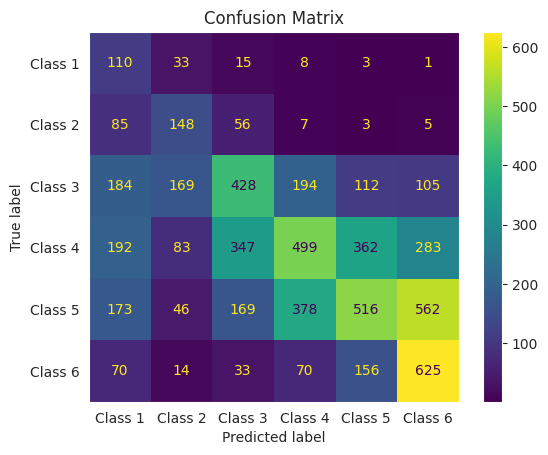

In [360]:
#@title ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
display.plot()
plt.title('Confusion Matrix')
plt.show()

Результат схожий до моделі на логістичній регресії.

**Висновок:**

*   проведено обробка та чистка даних, знайдено деякі закономірності для розуміння впливу ознак на реультат(рівень доходу, користування трафіком, тип та бренд девайсу, кількість дзвінків).
*   Після навчання моделей прогнозування - найкращий рещультат показала модель дерева рішень(точність 44%).

**Проблема:**
*   При найкращому результаті модель найбільше плутає 4 і 5 класси.

**Рекомендація:**
*   Додати до датасету більш влпливові ознаки.
